<a href="https://colab.research.google.com/github/VENKATRAJU153/MACHINE_LEARNING/blob/main/PLR_POS_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [21]:
df = pd.read_csv('/content/Position_Salaries.csv')
df.sample(5)

,Position,Level,Salary
1,Junior Consultant,2,50000
0,Business Analyst,1,45000
9,CEO,10,1000000
3,Manager,4,80000
7,Senior Partner,8,300000


In [22]:
X = df.iloc[:,1:2]
y = df.iloc[:,-1]
len(X),len(y)

(10, 10)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size=0.2, random_state=42)
len(X_train),len(y_train)

(8, 8)

In [24]:
#Now we are train the algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
# Now train performance prediction
y_train_predictions =reg.predict(X_train)
y_train_predictions

array([ 287068.96551724, -152370.68965517,  462844.82758621,
         23405.17241379,  638620.68965517,  199181.03448276,
        111293.10344828,  374956.89655172])

In [26]:
# Now test performance prediction
y_test_predictions =reg.predict(X_test)
y_test_predictions

array([550732.75862069, -64482.75862069])

In [27]:
from sklearn.preprocessing import PolynomialFeatures
X_rate = PolynomialFeatures(degree = 5)
X_poly = X_rate.fit_transform(X_train)
X_poly

array([[1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04]])

In [28]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(X_poly,y_train)

LinearRegression()

In [29]:
reg1.coef_

array([     0.        , 116355.39328243, -72923.53182752,  21032.71171424,
        -2643.13637708,    125.44408403])

In [30]:
X_train_pred_poly = reg1.predict(X_rate.fit_transform(X_train))
X_train_pred_poly

array([ 148951.37224752,   44998.85621529,  299802.62732519,
         60078.45089957, 1000009.07190326,  110882.13726555,
         79602.41845565,  200675.06568799])

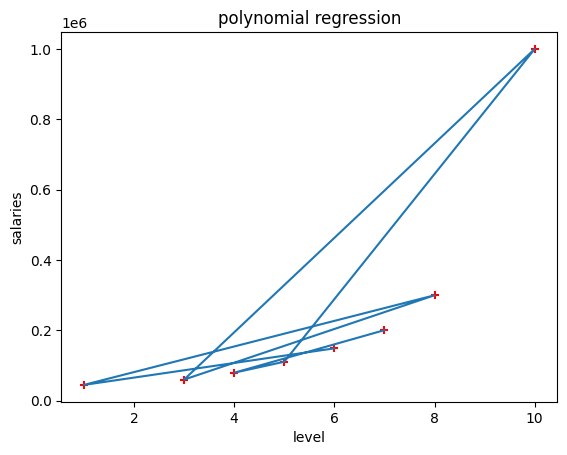

In [31]:
plt.title("polynomial regression")
plt.xlabel("level")
plt.ylabel("salaries")
plt.scatter(X_train,y_train,color="red",marker="+")
plt.plot(X_train,X_train_pred_poly)
plt.show()

In [32]:
from sklearn.metrics import r2_score
r2_score(y_train,X_train_pred_poly)*100

99.99963953442634

In [33]:
y_test_pred_poly = reg1.predict(X_rate.fit_transform(X_test))
y_test_pred_poly

array([522021.22443274,  54054.35696367])

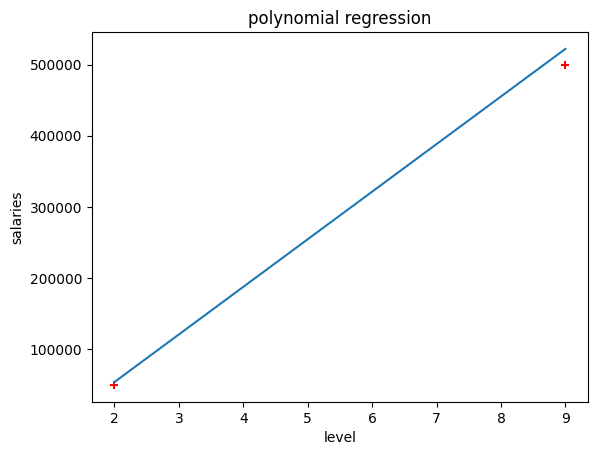

In [35]:
plt.title("polynomial regression")
plt.xlabel("level")
plt.ylabel("salaries")
plt.scatter(X_test,y_test,color="red",marker="+")
plt.plot(X_test,y_test_pred_poly)
plt.show()

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred_poly)*100

99.5048176435496